In [154]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

os.chdir('C:/Users/fando/Box Sync/Springboard/Capstone Project/Data')

In [64]:
dtype_dict = np.load('dtype_dict_processed.npy').item()
allData = pd.read_csv('allData_processed.txt', sep=" ", dtype = dtype_dict, encoding = "ISO-8859-1")

In [65]:
allData.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bedrooms,...,proty_Loft,proty_Other,proty_Timeshare,proty_Townhouse,insboo_f,insboo_t,avail_365,avail_60,avail_90,price
0,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",5,312,12,42,0,1.0,1.0,...,0,0,0,0,1,0,0.854795,0.2,0.466667,130.876344
1,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",5,312,12,42,0,1.0,1.0,...,0,0,0,0,1,0,0.854795,0.2,0.466667,130.876344
2,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",5,312,12,42,0,1.0,1.0,...,0,0,0,0,1,0,0.854795,0.2,0.466667,130.876344
3,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",5,312,12,42,0,1.0,1.0,...,0,0,0,0,1,0,0.854795,0.2,0.466667,130.876344
4,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",5,312,12,42,0,1.0,1.0,...,0,0,0,0,1,0,0.854795,0.2,0.466667,130.876344


In [5]:
summery_numeric = allData.describe()

In [66]:
summery_str = allData.describe(include=['O'])

In [67]:
summery_str.columns.values

array(['access', 'amenities', 'calendar_last_scraped', 'calendar_updated',
       'city', 'country', 'country_code', 'date', 'description',
       'experiences_offered', 'first_review', 'has_availability',
       'host_about', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_location',
       'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_url', 'host_verifications',
       'house_rules', 'interaction', 'is_location_exact',
       'jurisdiction_names', 'last_review', 'last_scraped', 'license',
       'listing_id', 'listing_url', 'market', 'medium_url',
       'monthly_price', 'name', 'neighborhood_overview', 'neighbourhood',
       'notes', 'picture_url', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license',
       'smart_location', 'space', 'state', 'street', 'summary',
       'th

In [68]:
allData_nan = (allData.isnull().sum() / allData.shape[0]) * 100
drop = allData_nan[allData_nan > 5].to_frame().reset_index()
drop

,index,0
0,access,54.125609
1,cleaning_fee,22.568662
2,first_review,6.861929
3,has_availability,66.860488
4,host_about,16.363213
5,host_acceptance_rate,55.953208
6,host_response_rate,19.306895
7,host_response_time,19.306895
8,house_rules,45.924839
9,interaction,54.227488


Create dummies for summary, security_deposit, transit and host_about.

In [69]:
allData['has_summary'] = allData['summary'].isnull().astype(int)
allData['has_deposit'] = allData['security_deposit'].isnull().astype(int)
allData['has_transit'] = allData['transit'].isnull().astype(int)
allData['has_host'] = allData['host_about'].isnull().astype(int)

Create variable 'summary_len'.

In [101]:
summary = allData['summary'].tolist()

In [104]:
allData['summary_len'] = list(map(len, summary))

In [107]:
allData.at[allData['summary_len']<5, 'summary']=0

In [108]:
allData.drop(list(drop['index']), axis=1, inplace=True)

In [109]:
allData = allData.dropna(axis=0, how='any')

In [110]:
allData.shape

(286558, 236)

In [111]:
len(allData.groupby('listing_id').size())

392

283118 observations; 236 columns.

This dataset includes 392 Airbnb listings in San Francisco, with their daily availability info from September 2015 to September 2017.

## Explore some key features

### Price

In [112]:
allData['price'].describe()

count    286558.000000
mean        217.530628
std         163.377528
min          20.000000
25%         125.000000
50%         167.721362
75%         257.507042
max        3000.000000
Name: price, dtype: float64

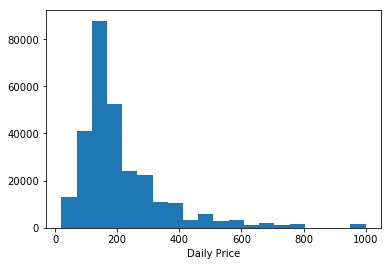

In [113]:
n, bins, patches = plt.hist(allData[allData['price']<=1000]['price'], 20)
plt.xlabel('Daily Price')

A closer look at the 0~400 range.

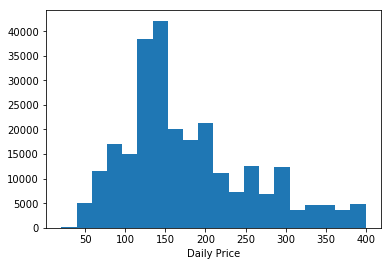

In [114]:
n, bins, patches = plt.hist(allData[allData['price']<=400]['price'], 20)
plt.xlabel('Daily Price')

### Availability

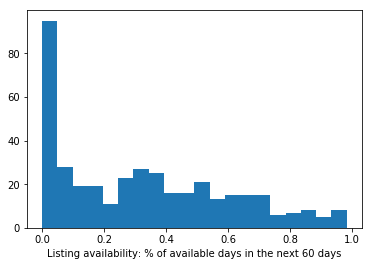

In [17]:
avail_60 = allData.groupby('listing_id')['avail_60'].mean()
n, bins, patches = plt.hist(avail_60, 20)
plt.xlabel('Listing availability: % of available days in the next 60 days')

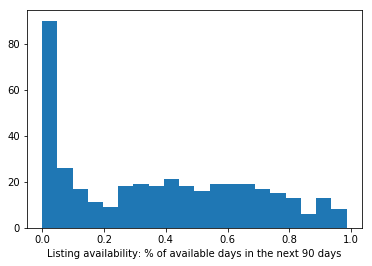

In [18]:
avail_90 = allData.groupby('listing_id')['avail_90'].mean()
n, bins, patches = plt.hist(avail_90, 20)
plt.xlabel('Listing availability: % of available days in the next 90 days')

### Room & Property Type

In [19]:
filter_col = [col for col in allData if col.startswith('room')]
sub = allData[filter_col]
sub["room_type"] = sub.idxmax(axis=1)
filter_col = [col for col in allData if col.startswith('proty')]
sub2 = allData[filter_col]
sub2["proty_type"] = sub2.idxmax(axis=1)

C:\Users\fando\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\fando\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


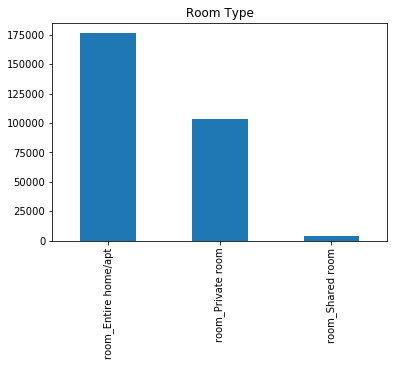

In [20]:
sub['room_type'].value_counts().plot(kind='bar')
plt.title('Room Type')

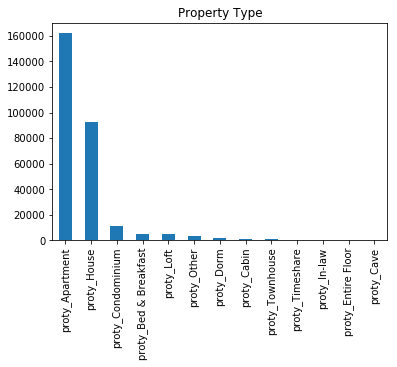

In [21]:
sub2['proty_type'].value_counts().plot(kind='bar')
plt.title('Property Type')

### Cancellation Policy

In [22]:
filter_col = [col for col in allData if col.startswith('cancel')]
sub = allData[filter_col]
sub["cancellation"] = sub.idxmax(axis=1)

C:\Users\fando\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


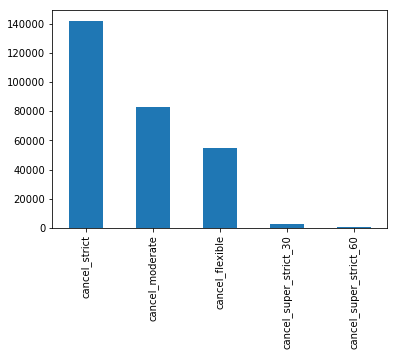

In [23]:
sub['cancellation'].value_counts().plot(kind='bar')

### Amenities

In [125]:
start = allData.columns.get_loc("tv")
end = allData.columns.get_loc("cancel_flexible")
amenities = allData.iloc[:, start:end]

In [126]:
amenities['listing_id'] = allData['listing_id']

In [127]:
amenities = amenities.drop_duplicates()

Most common amenities by listing.

In [128]:
amen_perc = (amenities.sum() / allData.shape[0]) * 100
amen_perc.sort_values(inplace=True, ascending=False)
amen_perc

listing_id                                  inf
internet                               0.397825
heating                                0.381773
essentials                             0.357694
smoke detector                         0.354553
kitchen                                0.343735
shampoo                                0.322448
tv                                     0.314073
carbon monoxide detector               0.284061
fire extinguisher                      0.275337
washer                                 0.274639
dryer                                  0.272196
first aid kit                          0.224736
family/kid friendly                    0.217757
hair dryer                             0.217408
iron                                   0.207986
hangers                                0.201006
laptop friendly workspace              0.184605
24-hour check-in                       0.146218
safety card                            0.123186
free parking on premises               0

In [129]:
drop = amen_perc[amen_perc < 0.05].to_frame().reset_index()
allData.drop(list(drop['index']), axis=1, inplace=True)

## Prepare Feature Set and Target Variable

In [173]:
drop = ['amenities', 'calendar_last_scraped', 'calendar_updated', 'city',
       'country', 'country_code', 'description', 'host_location', 'host_name',
       'host_picture_url', 'latitude', 'longitude', 'host_neighbourhood',
       'host_thumbnail_url', 'host_url', 'host_verifications',
       'is_location_exact', 'jurisdiction_names', 'last_scraped',
       'listing_id', 'listing_url', 'market', 'name', 'neighbourhood',
       'picture_url', 'availability_30', 'availability_365', 'experiences_offered',
       'availability_60', 'availability_90', 'available', 'host_id', 
       'smart_location', 'state', 'street', 'zipcode', 'scrape_id', 
       'avail_365', 'avail_60', 'avail_90', 'file_index', 'price_y']

In [174]:
features = allData.drop(drop, axis=1, inplace=False)

In [175]:
features_str = features.describe(include=['O'])

In [176]:
features_str

,date,host_has_profile_pic,host_identity_verified,host_is_superhost,host_since,require_guest_phone_verification,require_guest_profile_picture,requires_license
count,286558,286558,286558,286558,286558,286558,286558,286558
unique,732,2,2,2,331,2,2,2
top,2016-11-01,t,t,f,2013-05-12,f,f,t
freq,769,286497,227934,212025,6606,257962,268981,179513


In [177]:
features['date'] = pd.to_datetime(features['date'])
features['host_since'] = pd.to_datetime(features['host_since'])

In [178]:
features['host_for'] = (features['date'].dt.year - features['host_since'].dt.year) * 12 + (features['date'].dt.month - features['host_since'].dt.month)

In [179]:
features['book_month'] = features['date'].dt.month.astype('category')
features['book_year'] = features['date'].dt.year.astype('category')

In [180]:
month = features['date'].dt.month.tolist()
year = features['date'].dt.year.tolist()
day = features['date'].dt.day.tolist()
week = []

In [181]:
for i in list(range(0, len(year))):
    week.append(datetime.date(year[i], month[i], day[i]).isocalendar()[1])

In [182]:
features['book_week'] = week

In [183]:
features['host_identity_verified'] = features.host_identity_verified == 'none'
features['host_is_superhost'] = features.host_is_superhost == 't'
features['require_guest_phone_verification'] = features.require_guest_phone_verification == 't'
features['host_has_profile_pic'] = features.host_has_profile_pic == 't'
features['require_guest_profile_picture'] = features.require_guest_profile_picture == 't'
features['requires_license'] = features.requires_license == 't'

In [184]:
features = features.drop(['host_since', 'date'], axis=1, inplace=False)

What are in our feature set?

In [185]:
features.columns.values

array(['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'extra_people', 'guests_included',
       'host_has_profile_pic', 'host_identity_verified',
       'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'maximum_nights', 'minimum_nights',
       'number_of_reviews', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license', 'tv',
       'internet', 'kitchen', 'pets live on this property', 'dog(s)',
       'indoor fireplace', 'heating', 'family/kid friendly',
       'smoke detector', 'carbon monoxide detector', 'essentials',
       'washer', 'dryer', 'buzzer/wireless intercom', 'first aid kit',
       'safety card', 'fire extinguisher', 'shampoo',
       'free parking on premises', 'breakfast', '24-hour check-in',
       'hangers', 'hair dryer', 'iron', 'laptop friendly workspace',
       'self check-in', 'cancel_flexible', 'cancel_moderate',
       'cancel_strict', 'cancel_supe

Get the target variable ready.

In [186]:
target = allData['avail_60']

In [187]:
features['target'] = target

In [194]:
test = test.drop(['book_week'], axis=1, inplace=False)

In [195]:
test = test.drop_duplicates()

In [188]:
dtype_dict_ready = features.dtypes.apply(lambda x: x.name).to_dict()
np.save('dtype_dict_ready.npy', dtype_dict_ready) 
features.to_csv('allData_ready.txt', index=False, sep=' ', header=True)